<a href="https://colab.research.google.com/github/AswinTony2001/FinalYearProject/blob/main/FinalDenseNetNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import torch
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# Any results you write to the current directory are saved as output.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

url = '/content/drive/MyDrive/Final Project Dataset'
# datasets
labels = pd.read_csv(url+"/Detection/Final Training Detection.csv")
sample = pd.read_csv(url+'/Detection/Final Training Detection.csv')
label2 = pd.read_csv(url+"/Detection/Final Testing Detection.csv")

# folders paths
train_path = url+"/Common/Training/Final Training Images"
test_path = url+"/Common/Testing/Final Testing Images"


Mounted at /content/drive


<ipython-input-2-936e1cf18e7b>:8: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  label2 = pd.read_csv(url+"/Detection/Final Testing Detection.csv")


In [ ]:
print("Number of samples: ",len(sample))
print("Number of Labels: ",np.unique(labels.cuis))

Number of samples:  65000
Number of Labels:  ['C0000726' 'C0000737' 'C0000854' 'C0001613' 'C0002059' 'C0002978'
 'C0003873' 'C0005400' 'C0006660' 'C0009393' 'C0011923' 'C0013218'
 'C0014116' 'C0015392' 'C0015967' 'C0016330' 'C0017525' 'C0021102'
 'C0023884' 'C0024109' 'C0024204' 'C0024485' 'C0025867' 'C0027651'
 'C0030786' 'C0031511' 'C0032743' 'C0034603' 'C0034606' 'C0036002'
 'C0037088' 'C0037775' 'C0038215' 'C0039451' 'C0040399' 'C0040405'
 'C0041618' 'C0043162' 'C0046056' 'C0047506' 'C0085406' 'C0138741'
 'C0149871' 'C0152013' 'C0168634' 'C0175631' 'C0178602' 'C0179504'
 'C0205082' 'C0205090' 'C0205091' 'C0205094' 'C0205106' 'C0205123'
 'C0205129' 'C0205131' 'C0205132' 'C0205161' 'C0205195' 'C0205216'
 'C0205217' 'C0205225' 'C0205231' 'C0205276' 'C0205292' 'C0205409'
 'C0205410' 'C0205549' 'C0206754' 'C0221198' 'C0223084' 'C0225317'
 'C0225326' 'C0227481' 'C0227873' 'C0232338' 'C0237897' 'C0240318'
 'C0240873' 'C0242422' 'C0242485' 'C0243144' 'C0264545' 'C0268314'
 'C0270724' 'C033

In [ ]:
print(labels.ID)

0        ImageCLEFmedCaption_2022_train_000001
1        ImageCLEFmedCaption_2022_train_000002
2        ImageCLEFmedCaption_2022_train_000003
3        ImageCLEFmedCaption_2022_train_000004
4        ImageCLEFmedCaption_2022_train_000005
                         ...                  
64995    ImageCLEFmedCaption_2022_train_065396
64996    ImageCLEFmedCaption_2022_train_065397
64997    ImageCLEFmedCaption_2022_train_065398
64998    ImageCLEFmedCaption_2022_train_065399
64999    ImageCLEFmedCaption_2022_train_065400
Name: ID, Length: 65000, dtype: object


In [ ]:
classes = ["cuis"]
for i in range(2,4):
  classes.append(f"Unnamed: {i}")
labels = labels.astype(object).replace(np.nan, 'None')
labels["CombinedColumns"] = labels[classes].apply(lambda x: x.tolist(), axis=1)

In [ ]:
classes2 = ["cuis"]
for i in range(2,4):
  classes2.append(f"Unnamed: {i}")
label2 = label2.astype(object).replace(np.nan, 'None')
label2["CombinedColumns"] = label2[classes2].apply(lambda x: x.tolist(), axis=1)

In [ ]:
def to_jpg(id):
	return id+".jpg"


labels['ID'] = labels['ID'].apply(to_jpg)
sample['ID'] = sample['ID'].apply(to_jpg)
label2['ID'] = label2['ID'].apply(to_jpg)


In [ ]:
train_images=np.asarray(train_path)
X_test=np.asarray(train_path)
X=train_path
y=labels.cuis
print("Labels: ",y.shape)
print("images: ",X)
print(X)

Labels:  (65000,)
images:  /content/drive/MyDrive/Final Project Dataset/Common/Training/Final Training Images
/content/drive/MyDrive/Final Project Dataset/Common/Training/Final Training Images


In [ ]:
# Data agumentation and pre-processing using tensorflow
gen1 = ImageDataGenerator(
				rescale=1./224.,
				)

gen2 = ImageDataGenerator(
				rescale=1./224.,
				)

train_generator = gen1.flow_from_dataframe(
    labels, # dataframe
    directory = train_path, # images data path / folder in which images are there
    x_col = 'ID',
    y_col = 'CombinedColumns',
    subset="training",
    color_mode="rgb",
    target_size = (224,224), # image height , image width
    class_mode="categorical",
    batch_size=20,
    shuffle=False,
    seed=42,
)
 
 
validation_generator = gen2.flow_from_dataframe(
    labels, # dataframe
    directory = train_path, # images data path / folder in which images are there
    x_col = 'ID',
    y_col = 'CombinedColumns',
    subset="training",
    color_mode="rgb",
    target_size = (224,224), # image height , image width
    class_mode="categorical",
    batch_size=20,
    shuffle=False,
    seed=42,
)

IndentationError: ignored

In [ ]:
import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Activation, Dropout, GlobalAveragePooling2D, \
    BatchNormalization, concatenate, AveragePooling2D
from keras.optimizers import Adam



def conv_layer(conv_x, filters):
    conv_x = BatchNormalization()(conv_x)
    conv_x = Activation('relu')(conv_x)
    conv_x = Conv2D(filters, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(conv_x)
    conv_x = Dropout(0.2)(conv_x)

    return conv_x


def dense_block(block_x, filters, growth_rate, layers_in_block):
    for i in range(layers_in_block):
        each_layer = conv_layer(block_x, growth_rate)
        block_x = concatenate([block_x, each_layer], axis=-1)
        filters += growth_rate

    return block_x, filters


def transition_block(trans_x, tran_filters):
    trans_x = BatchNormalization()(trans_x)
    trans_x = Activation('relu')(trans_x)
    trans_x = Conv2D(tran_filters, (1, 1), kernel_initializer='he_uniform', padding='same', use_bias=False)(trans_x)
    trans_x = AveragePooling2D((2, 2), strides=(2, 2))(trans_x)

    return trans_x, tran_filters


def dense_net(filters, growth_rate, classes, dense_block_size, layers_in_block):
    input_img = Input(shape=(32, 32, 3))
    x = Conv2D(24, (3, 3), kernel_initializer='he_uniform', padding='same', use_bias=False)(input_img)

    dense_x = BatchNormalization()(x)
    dense_x = Activation('relu')(x)

    dense_x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(dense_x)
    for block in range(dense_block_size - 1):
        dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
        dense_x, filters = transition_block(dense_x, filters)

    dense_x, filters = dense_block(dense_x, filters, growth_rate, layers_in_block)
    dense_x = BatchNormalization()(dense_x)
    dense_x = Activation('relu')(dense_x)
    dense_x = GlobalAveragePooling2D()(dense_x)

    output = Dense(7184, activation='softmax')(dense_x)

    return Model(input_img, output)

In [ ]:
#from keras.utils import np_utils
#from sklearn.model_selection import train_test_split

#X_train = X
#y_train = y
#X_test = X
#y_test = y
#X_train, y_train= train_test_split(X, y, test_size=0.33)
#Cat_test_y = np_utils.to_categorical(y_test)
#y_train=np_utils.to_categorical(y_train)

#print("X_train shape : ",X_train.shape)
#print("y_train shape : ",y_train.shape)


In [ ]:
early = tf.keras.callbacks.EarlyStopping( patience=10,
										min_delta=0.001,
										restore_best_weights=True)
# early stopping call back
checkpoint_path = "/content/drive/MyDrive/Final Project Dataset/Models/cpDense22.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
dense_block_size = 3
layers_in_block = 4
growth_rate = 12
classes = 2
model = dense_net(growth_rate * 2, growth_rate, 7184, dense_block_size, layers_in_block)
model.summary()
batch_size = 20
epochs = 100
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 24)   648         ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 32, 32, 24)   0           ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 16, 16, 24)   0           ['activation[0][0]']             
                                                                                              

In [ ]:
batch_size=20
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = validation_generator.n//validation_generator.batch_size

# fit model
history = model.fit(train_generator,
					steps_per_epoch=10,
					validation_data=validation_generator,
					validation_steps=10,
					epochs=100,
					callbacks=[cp_callback]
)

Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 0.5732 - accuracy: 0.0800
Epoch 1: saving model to /content/drive/MyDrive/Final Project Dataset/Models/cpDense22.ckpt
10/10 [==============================] - 202s 20s/step - loss: 0.5732 - accuracy: 0.0800 - val_loss: 0.3659 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 0.3139 - accuracy: 0.0850
Epoch 2: saving model to /content/drive/MyDrive/Final Project Dataset/Models/cpDense22.ckpt
10/10 [==============================] - 123s 12s/step - loss: 0.3139 - accuracy: 0.0850 - val_loss: 0.2401 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 0.1607 - accuracy: 0.0800
Epoch 3: saving model to /content/drive/MyDrive/Final Project Dataset/Models/cpDense22.ckpt
10/10 [==============================] - 123s 12s/step - loss: 0.1607 - accuracy: 0.0800 - val_loss: 0.1872 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [===============

In [ ]:
#history = model.fit(train_generator)

In [ ]:
model.save("/content/drive/MyDrive/Final Project Dataset/Models/ModelDense22.h5")

Text(0.5, 1.0, '\nTraining and Validation Accuracy. \nTrain Accuracy:0.11999999731779099\nValidation Accuracy: 0.0')

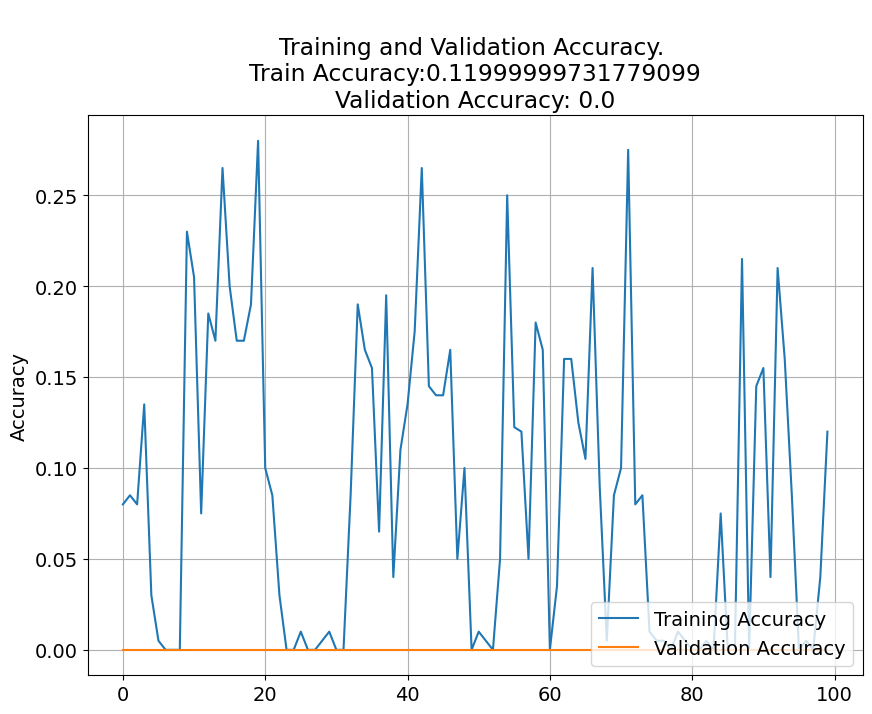

In [ ]:
# store results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


# plot results
# accuracy
plt.figure(figsize=(10, 16))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title(f'\nTraining and Validation Accuracy. \nTrain Accuracy:{str(acc[-1])}\nValidation Accuracy: {str(val_acc[-1])}')


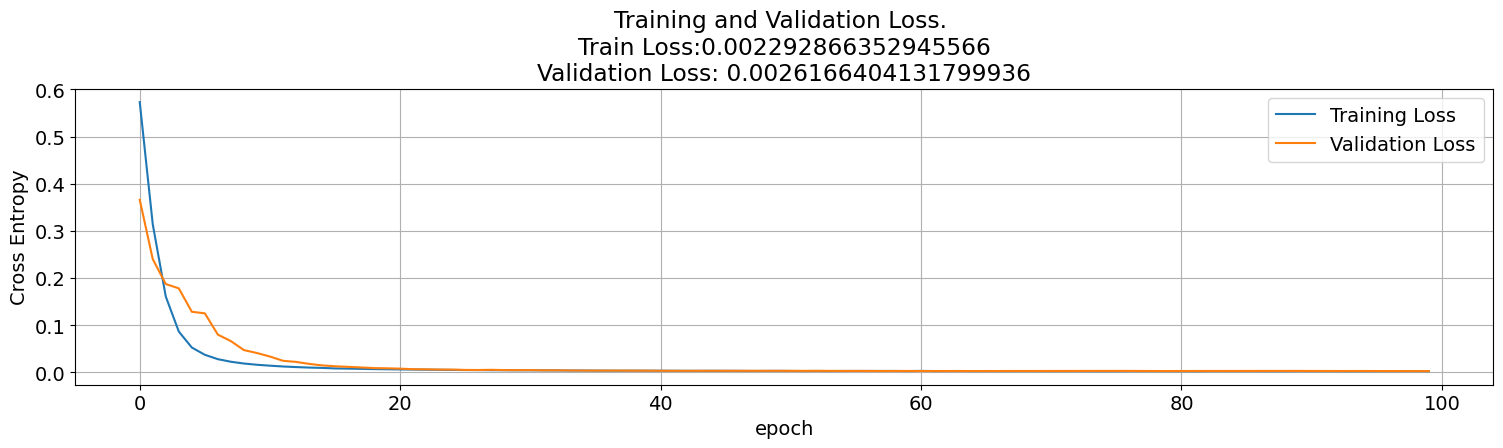

In [ ]:
# loss
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title(f'Training and Validation Loss. \nTrain Loss:{str(loss[-1])}\nValidation Loss: {str(val_loss[-1])}')
plt.xlabel('epoch')
plt.tight_layout(pad=3.0)
plt.show()


In [ ]:
accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))

print("Loss: ",accuracy_score[0])


3250/3250 [==============================] - 13055s 4s/step - loss: 0.0023 - accuracy: 0.1419
[0.0023002244997769594, 0.14186154305934906]
Accuracy: 14.1862%
Loss:  0.0023002244997769594


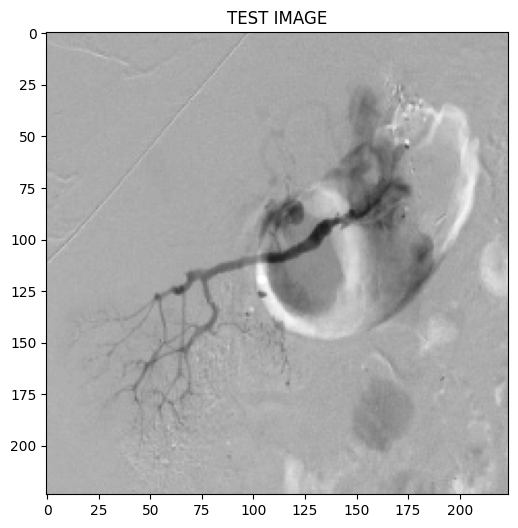

In [ ]:
test_img_path = test_path+"/ImageCLEFmedCaption_2022_train_065402.jpg"

img = cv2.imread(test_img_path)
resized_img = cv2.resize(img, (224, 224)).reshape(-1, 224, 224, 3)/224

plt.figure(figsize=(6,6))
plt.title("TEST IMAGE")
plt.imshow(resized_img[0])


In [ ]:
predictions = []
predictions1 = []
i = 0
model1 = keras.models.load_model("/content/drive/MyDrive/Final Project Dataset/Models/ModelDense22.h5")
img = tf.keras.preprocessing.image.load_img(test_img_path)
img = tf.keras.preprocessing.image.img_to_array(img)
img = tf.keras.preprocessing.image.smart_resize(img, (32, 32))
img = tf.reshape(img, (-1, 32, 32, 3))
prediction = model1.predict(img)
print(prediction)
#print(prediction[0].count_nonzero(x==1))
predictions.append(list(prediction[0]))
print(predictions)
top_3_idx = np.argsort(prediction[0])[-3:] 
print(top_3_idx)

#main_dict = validation_generator.class_indices
#def threshold(thres,output):
#  actual = []
#  j = 0
#  for i in range(len(output[0])):
#    if(output[0][i]>=thres):
#      actual.append(list(main_dict.keys())[i])
#  return actual

#predictions1 = threshold(1.,predictions)

my_submission = {'ID': 'ImageCLEFmedCaption_2022_train_065407', 'cuis': top_3_idx}
#my_submission.to_csv('submission.csv', index=False)

# Submission file ouput
print("Submission File: \n---------------\n")
print(predictions1)
print(my_submission) # Displaying first five predicted output


1/1 [==============================] - 0s 448ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 1.5117431e-12]]
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

In [ ]:
predictions = []
predictions1 = []
i = 0

for image in sample.ID:
  if i!=601:
    img = tf.keras.preprocessing.image.load_img(train_image +'/'+ image+'.jpg')
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = tf.keras.preprocessing.image.smart_resize(img, (32, 32))
    img = tf.reshape(img, (-1, 32, 32, 3))
    prediction = model.predict(img/32)
    print(prediction)   
    predictions.append(str(prediction))
    print(predictions)
  
    main_dict = validation_generator.class_indices
    def threshold(thres,output):
      actual = []
      for i in range(len(output)):
        if(output[i]>=str(thres)):
          actual.append(list(main_dict.keys())[i])
      return actual
    predictions1.append(threshold(0.45,predictions))
    i=i+1

my_submission = pd.DataFrame({'ID': sample.ID, 'cuis': predictions1})
my_submission.to_csv('submission33.csv', index=False)

# Submission file ouput
print("Submission File: \n---------------\n")
print(my_submission.head()) # Displaying first five predicted output


In [ ]:
mapping_df = pd.read_csv('/content/drive/MyDrive/Final Project Dataset/Detection/72d678c1-c535-491d-bc42-c2ba11f47165_concepts.csv')

In [ ]:
Modality_Mapping = dict()
k = 0
l = 0
predictions = []
predictions1 = []
predictions2 = []
predictions4 = []
predictions5 = []
predictions6 = []
predictions7 = []
predictions3 = pd.read_csv("/content/drive/MyDrive/Final Project Dataset/Models/submission12.csv")
for i in range(0,5000):
  predictions4 = predictions3['cuis'][i].split()
  if k == 0:  
    predictions4.remove('[')
  else:
    predictions4[0] = predictions4[0].replace('[','')
  predictions4[2] = predictions4[2].replace(']','')
  predictions5.append(predictions4)  
  k = k + 1
for i in mapping_df.index:
  Modality_Mapping[mapping_df['concept'][i]] = mapping_df['concept_name'][i]
for x in range(0,5000):
  p =0
  for j in mapping_df.index:
    if str(j) == predictions5[x][1] or str(j) == predictions5[x][2]:
      if x >= 0 and x <= 500 and p == 0:
        predictions1.append(2300) 
        predictions2.append(mapping_df['concept'][2300])
        predictions.append(mapping_df['concept_name'][2300])
        p = p+1 
      if x >= 301 and x <= 5000 and p == 0:
        predictions1.append(8123) 
        predictions2.append(mapping_df['concept'][8123])
        predictions.append(mapping_df['concept_name'][8123])
        p = p+1 
      predictions1.append(j) 
      predictions2.append(mapping_df['concept'][j])
      predictions.append(mapping_df['concept_name'][j]) 

def split(list_a, chunk_size):
  for i in range(0, len(list_a), chunk_size):
    yield list_a[i:i + chunk_size]

chunk_size = 3
predictions6 = list(split(predictions2, chunk_size))
predictions7 = list(split(predictions, chunk_size))

In [ ]:
print(predictions6[302])
print(predictions7[302])

['C0002978', 'C0028879', 'C1710048']
['angiogram', 'Odontogenic Cysts', 'Semi-Circle']


In [ ]:
print(labels['CombinedColumns'][5])
print(predictions6[5])

['C0002978', 'C0205091', 'None']
['C0002978', 'C0205122', 'C0180479']


In [ ]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import MultiLabelBinarizer

predictions3 = pd.read_csv("/content/drive/MyDrive/Final Project Dataset/Models/submission12.csv")
# define true labels
true_labels = ["a", "c", "b", "a"]

# define corresponding predicted labels
pred_labels = ["c", "c", "b", "a"]
score = []
for x in range(0,5000):
  #print(labels['CombinedColumns'][x])
  #print(predictions5[x])
  score.append(f1_score(label2['CombinedColumns'][x],predictions6[x], average="macro"))

def Average(lst):
    return sum(lst) / len(lst)

averageF1 = Average(score)
print(averageF1)
#score = f1_score(true_labels, pred_labels, average="micro")
#print("Micro F1-Score: ", score)

#score = f1_score(true_labels, pred_labels, average="weighted")
#print("Weighted F1-Score: ", score)

0.2037200000000169
